In [1]:
# libaries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from itertools import combinations 
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv


Task 1: The Basic Audit: How many unique categories, sub-categories, and products are in the dataset?
    Task 1 a: Create a bar chart showing the count of products per Category.

Task 2: Which city had the biggest loss 
    Task 2 a: Create a "Bottom 10" horizontal bar chart of the 10 most unprofitable cities.

Task 3: Shipping Efficiency: Calculate the average time (in days) it takes for an order to ship (Ship Date - Order Date).
    Task 3 a: Plot a histogram to see the distribution of shipping times (How many orders take 1 day vs 7 days?).

Task 4: Regional Power: Which Region has the highest total Sales, and which has the highest average Profit per order?
    Task 4 a: A side-by-side bar chart comparing total Sales vs. total Profit for each Region.

Task 5: "Analyze how the three customer segments (Consumer, Corporate, Home Office) compare in total sales volume across the four geographic regions."

 Task 5a: "Create a line graph where each line represents a Segment, showing their sales 'path' across the Central, East, South, and West regions."

Task 6: The "80/20" Rule: Identify the Top 20 customers by total profit. How much of the total store profit do these 20 people account for?
    Task 6 a: : A Pie chart showing "Top 20 Customers" vs. "Everyone Else."

Task 7: Segment Deep-Dive: Within the 'Technology' category, which Sub-Category is the most profitable in the 'East' region vs. the 'West' region?
    Task 7 a: A Heatmap showing Profit across all Sub-Categories and Regions.

Task 8: Discount Impact: Create a new column that groups Discount into three buckets: No Discount (0), Low (0.1–0.3), and High (0.4+). Compare the average profit for these three buckets.
    Task 8 a: A Boxplot showing how Profit varies across your three Discount buckets.

Task 9: Customer Loyalty: Find customers who have placed orders in at least 3 different years. What is the average "Total Spend" for these loyal customers?
    Task 9 a: A Scatter plot showing Customer "Tenure" (years active) vs. Total Spend.\

Task 10 : Product Synergy (Market Basket): For all orders that contain more than one item, what is the most common pair of Sub-Categories bought together in the same Order ID?
    Task 10 a: A Network graph or a simple bar chart of the most common product pairings.

# Step 1: import data 

In [2]:
df = pd.read_csv('/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv')

# Getting a feel for the data 

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# cehcking the shape of the data frame 
df.shape

(9994, 13)

In [5]:
# checking for NA values 
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Checking data types 
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Task 1: 
Find the number of:
    
    - Categories 
   
    - Sub-categories 
   
    - Cities


Create a bar chart showing region vs city 

In [8]:
# finding the total  number of unique cateogries 
df['Category'].nunique()

3

In [9]:
# Finding the names of the unique categories
df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

The total number of unique categories is 3 and they are Furniture, Office supplies, Technology

In [10]:
# finding the total number of unique sub categories 
df['Sub-Category'].nunique()

17

In [11]:
# finding the total number of unique cities 
df['City'].nunique()

531

In [12]:
# creating a barplot 


In [13]:
# step 1 Summary
region_data = df.groupby('Region')['City'].nunique().reset_index()

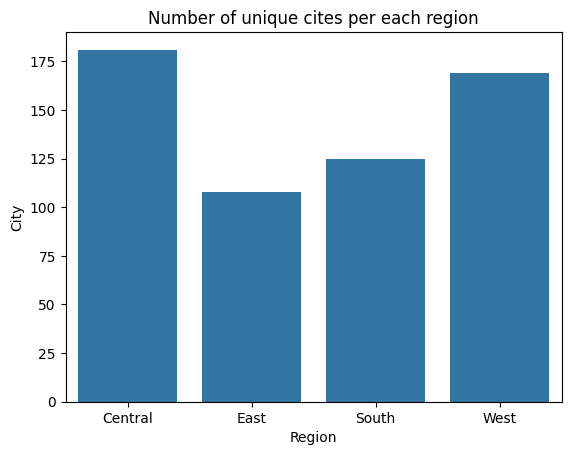

In [14]:
sns.barplot(data = region_data, x = 'Region',y='City')
plt.title('Number of unique cites per each region')
plt.show()

# Task 2: 
Which city had the biggest loss 

Task 2 a: Create a "Bottom 10" horizontal bar chart of the 10 most unprofitable cities.

In [15]:
loss = df.sort_values(by = 'Profit')

In [16]:
loss.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


The city with the greast loss is Lancaster Ohio with a loss of -6599.9780


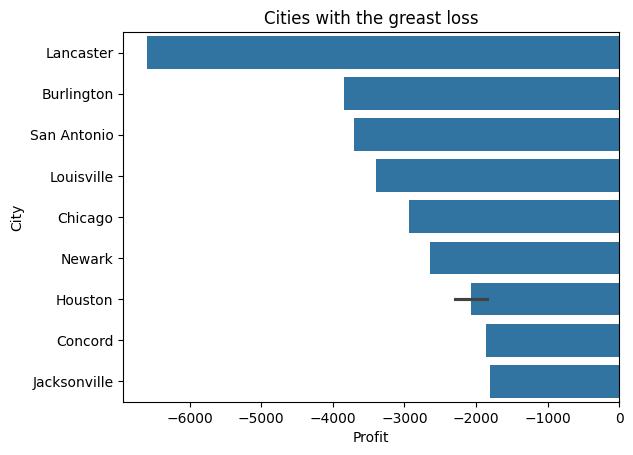

In [17]:
sns.barplot(data=loss.head(10), x = 'Profit',y='City')
plt.title('Cities with the greast loss')
plt.show()

# Task 3:
Which Category is the most profitable, and which Sub-Category is the least profitable?

Create a Category Profit Pie Chart

In [18]:
most_profitable_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)

In [19]:
most_profitable_category.head()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

The most profitable catefory is Furniture 

In [20]:
Least_profitable_sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values()

In [21]:
Least_profitable_sub_category.head()

Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

The least profitable sub category is Tables 

/tmp/ipykernel_17/3169079060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Least_profitable_sub_category.index, y=Least_profitable_sub_category.values, palette='RdYlGn')


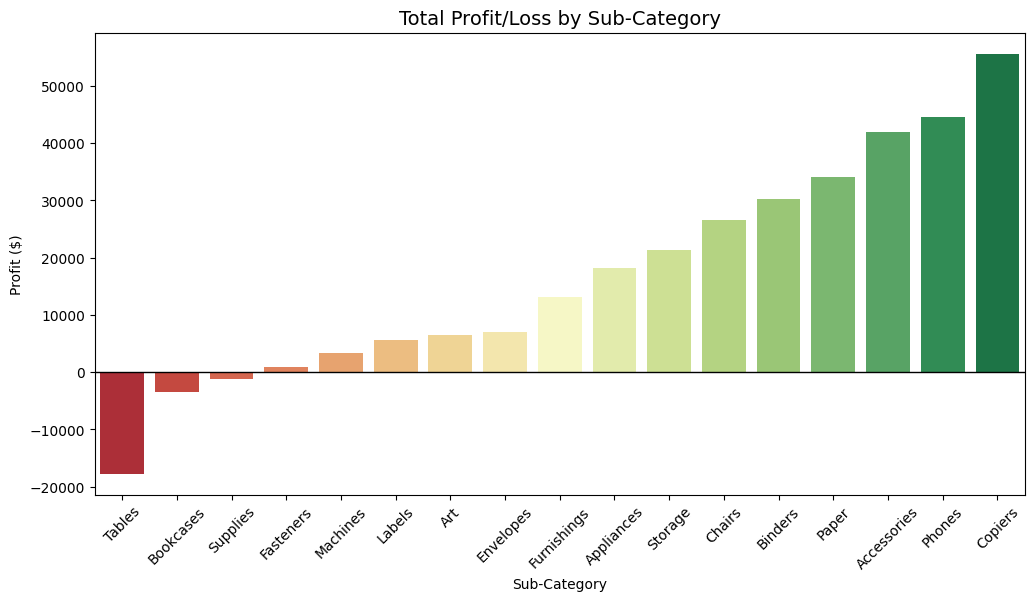

In [22]:
plt.figure(figsize=(12, 6))
# Using the sorted data we just created
sns.barplot(x=Least_profitable_sub_category.index, y=Least_profitable_sub_category.values, palette='RdYlGn')
plt.xticks(rotation=45)
plt.title('Total Profit/Loss by Sub-Category', fontsize=14)
plt.axhline(0, color='black', linewidth=1) # The "Waterline" - anything below this is a loss
plt.ylabel('Profit ($)')
plt.show()

# Task 4: 
Regional Power: Which Region has the highest total Sales, and which has the highest average Profit per order?

Task 4 a: A side-by-side bar chart comparing total Sales vs. total Profit for each Region.

In [23]:
# highest total sales 
Regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending = False )
Regional_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [24]:
# average profit for region 
average_profit_per_region = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
average_profit_per_region

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64

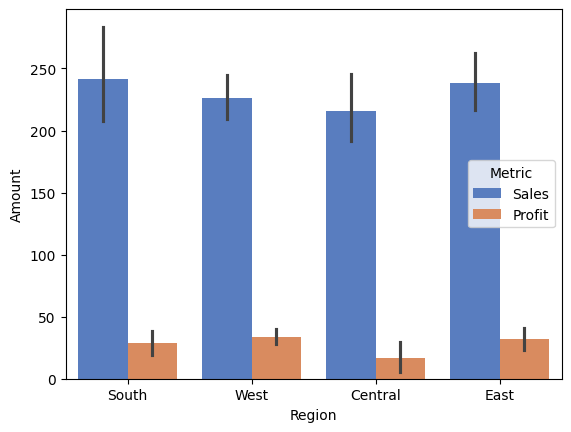

In [25]:
df_long = df.melt(id_vars='Region', value_vars=['Sales', 'Profit'], 
                  var_name='Metric', value_name='Amount')

sns.barplot(data=df_long, x='Region', y='Amount', hue='Metric', palette='muted')
plt.show()

# Task 5 
Task 5: "Analyze how the three customer segments (Consumer, Corporate, Home Office) compare in total sales volume across the four geographic regions."

 Task 5a: "Create a line graph where each line represents a Segment, showing their sales 'path' across the Central, East, South, and West regions.

In [26]:
df.groupby(['Region','Segment','Sales']).sum().reset_index()

,Region,Segment,Sales,Ship Mode,Country,City,State,Postal Code,Category,Sub-Category,Quantity,Discount,Profit
0,Central,Consumer,0.444,Standard Class,United States,Houston,Texas,77095,Office Supplies,Appliances,1,0.8,-1.1100
1,Central,Consumer,0.984,First Class,United States,Houston,Texas,77041,Office Supplies,Binders,2,0.8,-1.4760
2,Central,Consumer,1.080,Standard Class,United States,Dallas,Texas,75220,Office Supplies,Binders,3,0.8,-1.7280
3,Central,Consumer,1.112,Same Day,United States,Houston,Texas,77041,Office Supplies,Binders,2,0.8,-1.8904
4,Central,Consumer,1.188,Standard Class,United States,Houston,Texas,77095,Office Supplies,Binders,1,0.8,-1.9602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,West,Home Office,3023.928,Standard Class,United States,Santa Barbara,California,93101,Technology,Phones,9,0.2,226.7946
8929,West,Home Office,3357.600,First Class,United States,Los Angeles,California,90045,Technology,Machines,3,0.2,377.7300
8930,West,Home Office,3359.952,Standard Class,United States,Los Angeles,California,90032,Technology,Copiers,6,0.2,1049.9850
8931,West,Home Office,4158.912,First Class,United States,Los Angeles,California,90008,Technology,Phones,8,0.2,363.9048


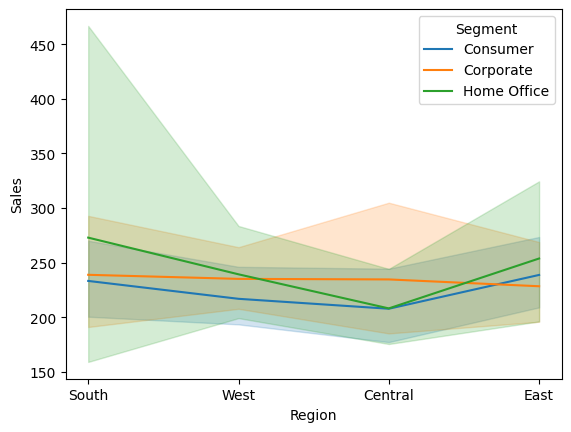

In [27]:
sns.lineplot(data=df,x = 'Region',y='Sales',hue='Segment')
plt.show()

Task 6: The "80/20" Rule: Identify the Top 20 cities by total profit. How much of the total store profit do these 20 cities account for?
    Task 6 a: : A Pie chart showing "Top 20 Cities" vs. "Everyone Else."

In [28]:
city_profit = df.groupby('City')['Profit'].sum().reset_index()
city_profit  = city_profit.sort_values(by='Profit',ascending=False)
top_20 = city_profit.head(20)['Profit'].sum()
total_profit = df['Profit'].sum()
everyone_else = total_profit - top_20

In [29]:

percentage = (top_20/total_profit) * 100
print('The top 20 cities account for'+str(percentage)+' % of total sales')

The top 20 cities account for83.72914542777175 % of total sales


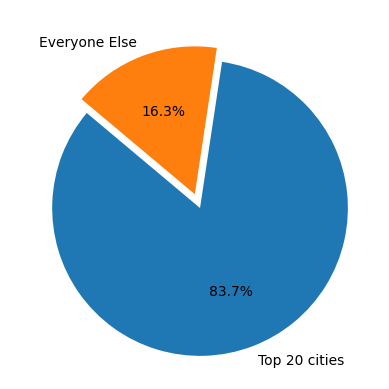

In [30]:
labels = ['Top 20 cities','Everyone Else']
values = [top_20,everyone_else]
colors = ['#2ecc71','#bdc3c7']
plt.pie(values,labels=labels, autopct='%1.1f%%',startangle=140,explode=(0.1,0))
plt.show()

# Task 7:
Segment Deep-Dive: Within the 'Technology' category, which Sub-Category is the most profitable in the 'East' region vs. the 'West' region? Task 7 a: A Heatmap showing Profit across all Sub-Categories and Regions.

In [31]:
# filter 1 keep only rows where category == technology 
technology_df = df[df['Category'] == 'Technology']
technology_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737


In [32]:
# filter 2 split those results into two groups east and west 
technology_comparison = technology_df.groupby(['Region','Sub-Category'])['Profit'].sum().reset_index()
technology_comparison

,Region,Sub-Category,Profit
0,Central,Accessories,7251.6306
1,Central,Copiers,15608.8413
2,Central,Machines,-1486.0666
3,Central,Phones,12323.0267
4,East,Accessories,11195.8644
5,East,Copiers,17022.8418
6,East,Machines,6928.6429
7,East,Phones,12314.6860
8,South,Accessories,7004.5424
9,South,Copiers,3658.9067


In [33]:
# filter 2 pivot data to see east vs west 
print(technology_comparison[technology_comparison['Region'].isin(['East','West'])])

   Region Sub-Category      Profit
4    East  Accessories  11195.8644
5    East      Copiers  17022.8418
6    East     Machines   6928.6429
7    East       Phones  12314.6860
12   West  Accessories  16484.5983
13   West      Copiers  19327.2351
14   West     Machines   -618.9264
15   West       Phones   9110.7426


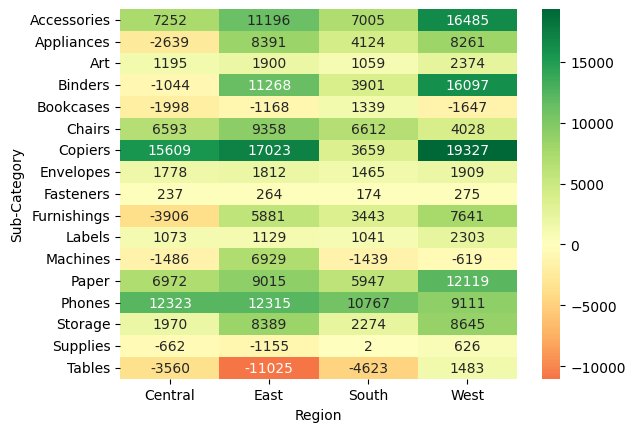

In [34]:
# creating heatmap 
pivot_table = df.pivot_table(index='Sub-Category',columns='Region',values='Profit',aggfunc='sum')
sns.heatmap(pivot_table,annot=True,fmt=".0f",cmap='RdYlGn',center=0)
plt.show()

# Task 8: 
Discount Impact: Create a new column that groups Discount into three buckets: No Discount (0), Low (0.1–0.3), and High (0.4+). Compare the average profit for these three buckets. Task 8 a: A Boxplot showing how Profit varies across your three Discount buckets.

In [35]:
bins = [-1,-0,0.3,float('inf')]
labels = ['No Discount','Low','High']
df['Discount_Category'] = pd.cut(df['Discount'],bins=bins,labels=labels)

In [36]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Discount_Category
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,No Discount
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,No Discount
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,No Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,High
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Low


In [37]:
# filter the data ro remove outliers 
filtered = df[(df['Profit'] > - 500 ) & (df['Profit'] < 500)]


/tmp/ipykernel_17/1555066880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount_Category',y='Profit', data = filtered,palette='Set2')


<Axes: xlabel='Discount_Category', ylabel='Profit'>

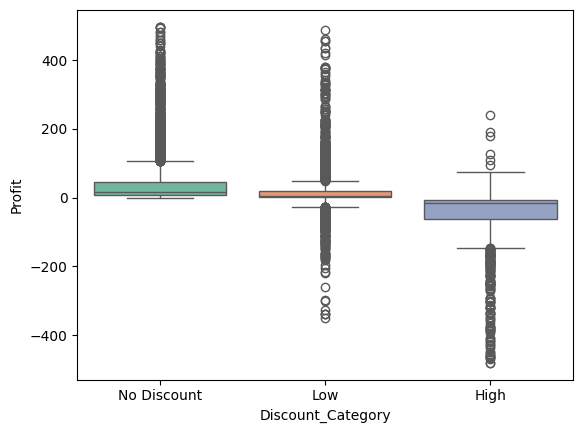

In [38]:
sns.boxplot(x='Discount_Category',y='Profit', data = filtered,palette='Set2')

# Task 9:
Customer Loyalty: Find customers who have placed orders in at least 3 different years. What is the average "Total Spend" for these loyal customers?
    Task 9 a: A Scatter plot showing Customer "Tenure" (years active) vs. Total Spend.\

In [39]:
# since my data set does not have a customer column I am going to use postal coade 
# Treating every postal code as a unique customer 
# we are going to pivot this to track loyal hubs 
hub_stats = df.groupby('Postal Code').agg(
    Total_spend = ('Sales','sum'),
    Order_Count = ('Sales','count'),
    Category_Diversty = ('Category','nunique'),
    Avg_Profit = ('Profit','mean')
    
).reset_index()

In [40]:
# definning a loyal hum 
# 10 plus orders and 3 + different categories
loyal_hubs = hub_stats[
(hub_stats['Order_Count']>=10) & (hub_stats['Category_Diversty']>=3)
]

In [41]:
avg_spend_loyal = loyal_hubs['Total_spend'].mean()
avg_spend_loyal

np.float64(9482.56200097561)

<Axes: xlabel='Order_Count', ylabel='Total_spend'>

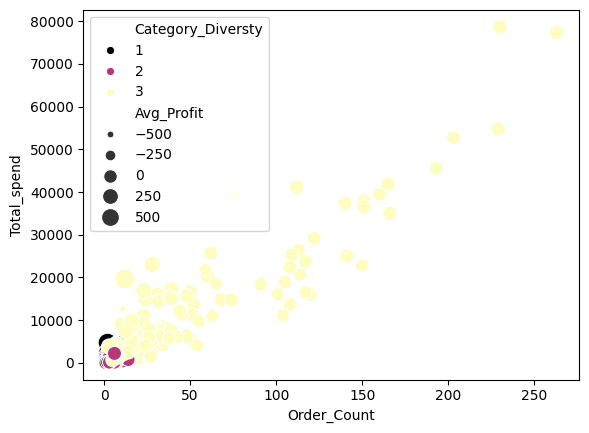

In [42]:
# scatter plot 
sns.scatterplot(
    data=hub_stats, 
    x='Order_Count', 
    y='Total_spend', 
    hue='Category_Diversty', 
    size='Avg_Profit', 
    sizes=(20, 200),
    palette='magma'
)

# Task 10 :
Product Synergy (Market Basket): For all orders that contain more than one item, what is the most common pair of Sub-Categories bought together in the same Order ID? Task 10 a: A Network graph or a simple bar chart of the most common product pairings.

In [43]:
# create a proxy order ID since the real one is missing 
df['Proxy_Order_ID'] = df['Postal Code'].astype(str) + df['Segment'] + df['Ship Mode']


In [44]:
basket_data = df.groupby('Proxy_Order_ID')['Sub-Category'].apply(list)


In [45]:
multi_item_baskets = basket_data[basket_data.apply(len) > 1]

# 4. Use itertools to find every unique pair in every basket
pair_counts = Counter()

for items in multi_item_baskets:
    # Sort items so (A, B) is the same as (B, A)
    items.sort()
    # Find all combinations of 2
    for pair in combinations(items, 2):
        # Don't count the same item paired with itself (e.g., Paper & Paper)
        if pair[0] != pair[1]:
            pair_counts[pair] += 1

In [46]:
top_pairs = pair_counts.most_common(10)

# Convert to a DataFrame for plotting
top_pairs_df = pd.DataFrame(top_pairs, columns=['Pair', 'Frequency'])
top_pairs_df['Pair_Name'] = top_pairs_df['Pair'].apply(lambda x: f"{x[0]} & {x[1]}")

print(f"The most common pair is: {top_pairs_df.iloc[0]['Pair_Name']}")

The most common pair is: Binders & Paper


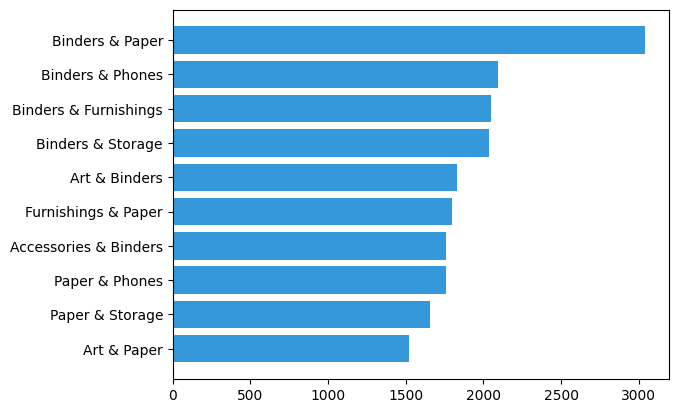

In [47]:
plt.barh(top_pairs_df['Pair_Name'],top_pairs_df['Frequency'],color='#3498db')
plt.gca().invert_yaxis()